In [30]:
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt


In [31]:
omag_path = "/Users/peilinli/Documents/fydp.nosync/optics-project/training-data/2015-09-07-Images-46/OMAG Bscans/"
omage_image_path = omag_path + "64.png"


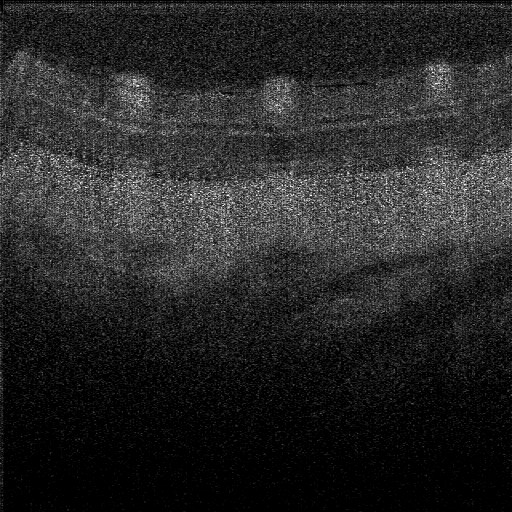

In [32]:
original_image = Image.open(omage_image_path)
original_image


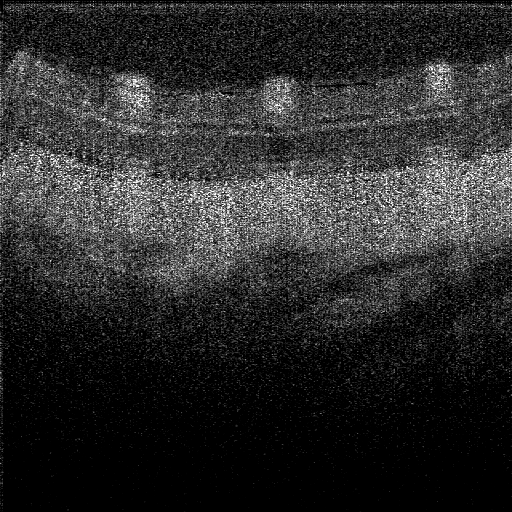

In [33]:
contrast_enhancer = ImageEnhance.Contrast(original_image)
contrast_image = contrast_enhancer.enhance(1.5)
contrast_image


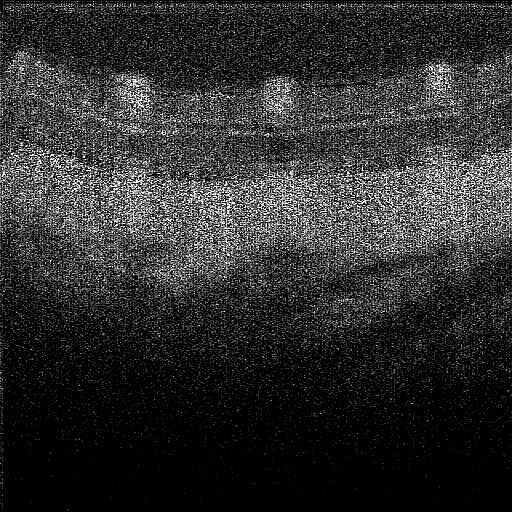

In [34]:
sharpness_enhancer = ImageEnhance.Sharpness(contrast_image)
sharpened_image = sharpness_enhancer.enhance(2.0)
sharpened_image


<Figure size 216x432 with 0 Axes>

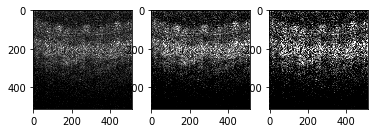

In [35]:
%matplotlib inline
plt.figure(figsize=(3, 6))
fig, ax = plt.subplots(1, 3)
plt.gray()
ax[0].imshow(original_image)
ax[1].imshow(contrast_image)
ax[2].imshow(sharpened_image)
plt.show()


In [36]:
from enface.slicer import Slicer
from enface.loader import Loader


In [37]:
LOW_BOUND_LAYER = 60
HIGH_BOUND_LAYER = 240
IMAGE_DIMENSIONS = original_image.size
input_type = Loader.InputType.OMAG
loader = Loader(src_dir=omag_path, input_type=input_type, image_dimensions=IMAGE_DIMENSIONS)


Loading 319 images from `/Users/peilinli/Documents/fydp.nosync/optics-project/training-data/2015-09-07-Images-46/OMAG Bscans/` ...


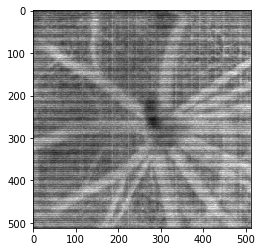

In [38]:
original_eye = loader.load_data_set(enable_enhancement=False)
slicer = Slicer(original_eye, IMAGE_DIMENSIONS)
slicer.multi_slice_sum(original_eye, LOW_BOUND_LAYER, HIGH_BOUND_LAYER)


Loading 319 images from `/Users/peilinli/Documents/fydp.nosync/optics-project/training-data/2015-09-07-Images-46/OMAG Bscans/` ...


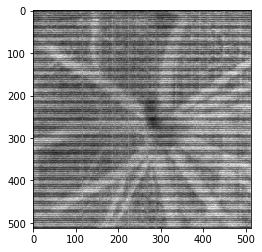

In [39]:
enhanced_eye = loader.load_data_set(enable_enhancement=True)
slicer = Slicer(enhanced_eye, IMAGE_DIMENSIONS)
slicer.multi_slice_sum(enhanced_eye, LOW_BOUND_LAYER, HIGH_BOUND_LAYER)
